In [ ]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

In [2]:
import numpy as np
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# goal
GOAL = 100

# all states, including state 0 and state 100
STATES = np.arange(GOAL + 1)

# probability of head
HEAD_PROB = 0.4

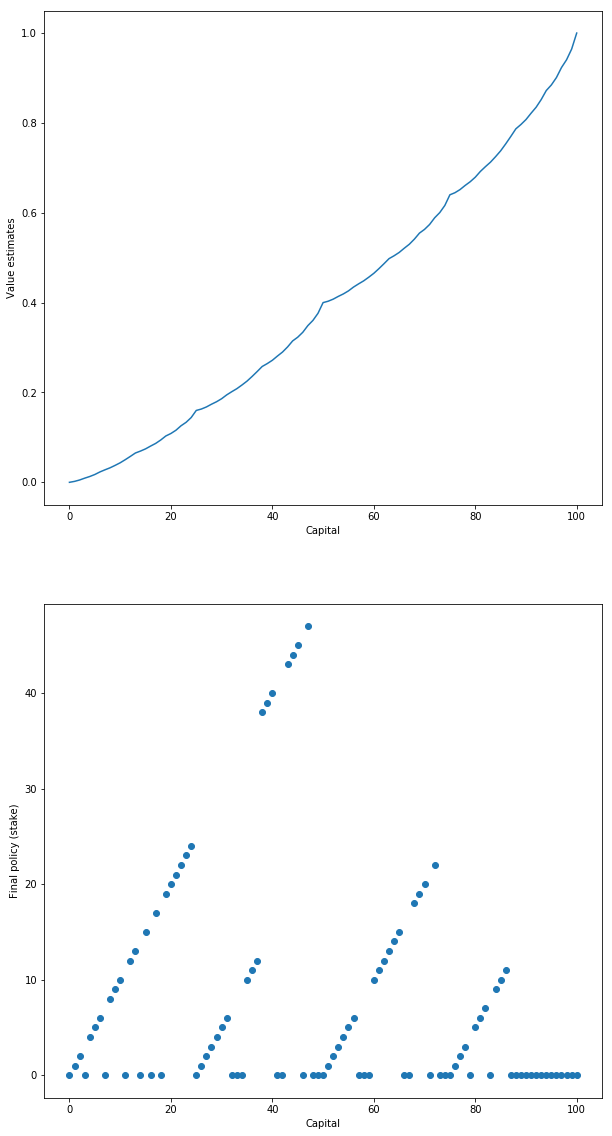

In [4]:
def figure_4_3():
    # state value
    state_value = np.zeros(GOAL + 1)
    state_value[GOAL] = 1.0

    # value iteration
    while True:
        delta = 0.0
        for state in STATES[1:GOAL]:
            # get possilbe actions for current state
            actions = np.arange(min(state, GOAL - state) + 1)
            action_returns = []
            for action in actions:
                action_returns.append(
                    HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])
            new_value = np.max(action_returns)
            delta += np.abs(state_value[state] - new_value)
            # update state value
            state_value[state] = new_value
        if delta < 1e-9:
            break

    # compute the optimal policy
    policy = np.zeros(GOAL + 1)
    for state in STATES[1:GOAL]:
        actions = np.arange(min(state, GOAL - state) + 1)
        action_returns = []
        for action in actions:
            action_returns.append(
                HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])
        # due to tie, can't reproduce the optimal policy in book
        policy[state] = actions[np.argmax(action_returns)]

    plt.figure(figsize=(10, 20))

    plt.subplot(2, 1, 1)
    plt.plot(state_value)
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')

    plt.subplot(2, 1, 2)
    plt.scatter(STATES, policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')

    plt.show()

figure_4_3()